<a href="https://colab.research.google.com/github/simionattovini/thermal-machines/blob/main/heat-exchangers%20/ideal-exchangers-simulation/sim_counter_flow_heat_exchanger.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Counter Flow Heat Exchanger

The concept is as follows:
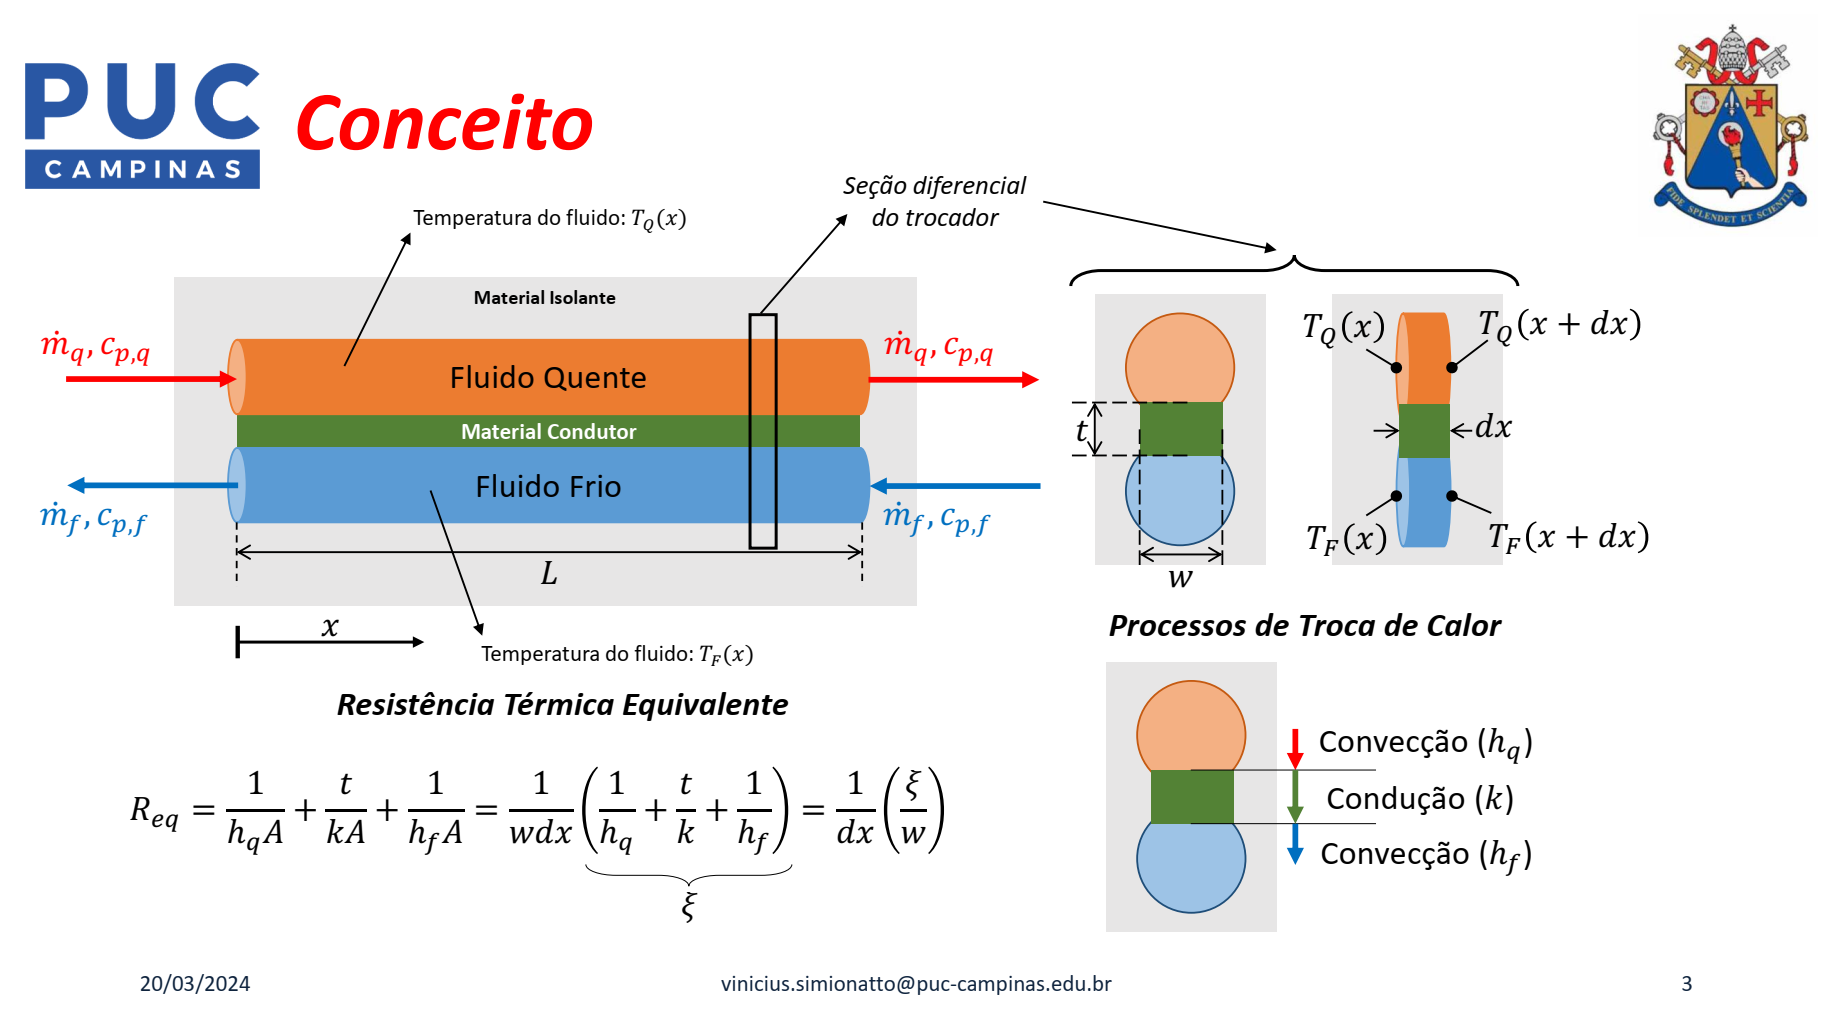

The temperatures in the hot and cold pipes are given by $T_Q(x)$ and $T_F(x)$, respectively.

The system operates in steady state and the temperatures are measured along the $x$-axis.

The ODEs that describe this system are:
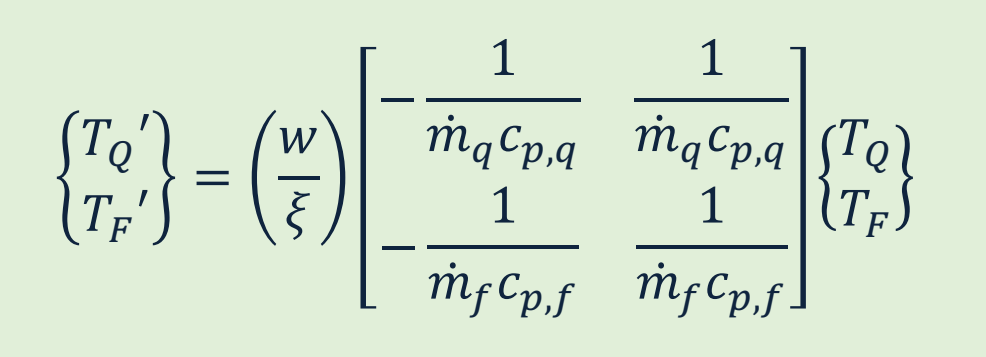

And the solution for the temperatures is given by:

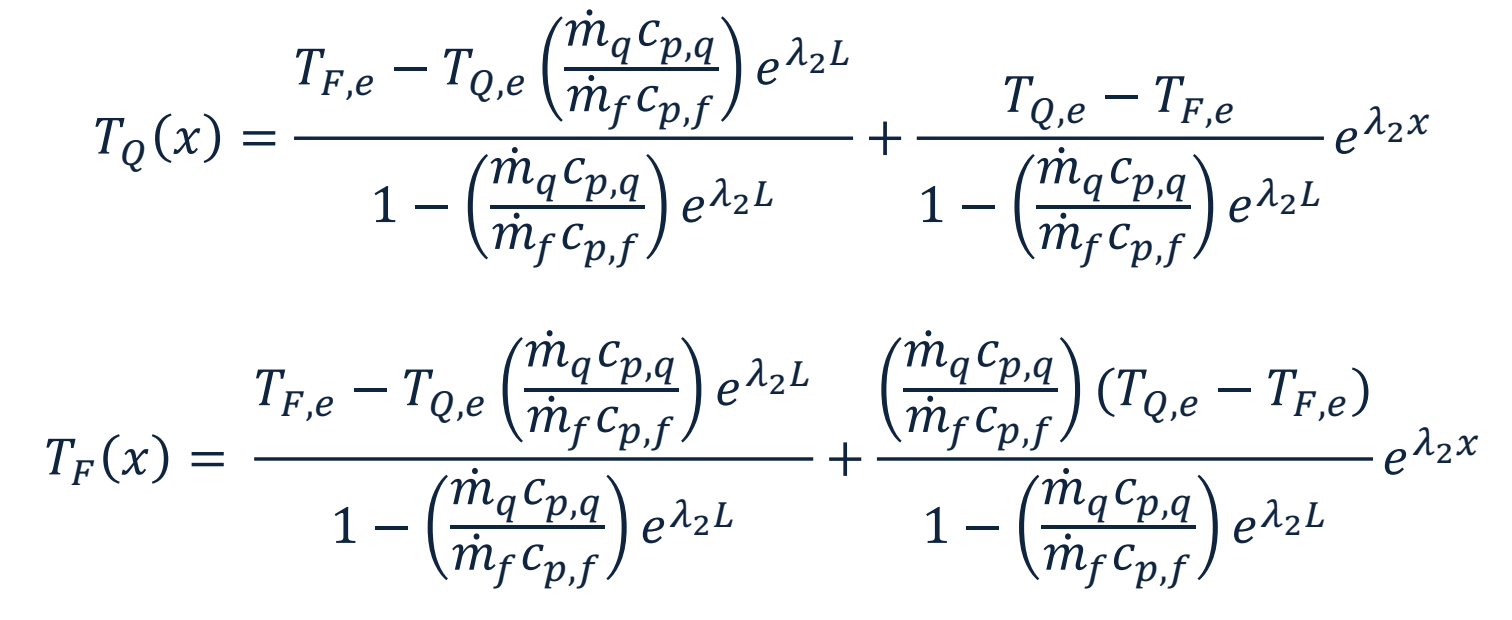

, where $T_{Q,e}$ and $T_{F,e}$ are the temperatures of the hot and cold fluid when entering the heat exchanger, respectively.

Once the specific heats ($c_p$) are used to calculate the temperature variation of the fluid, this model doesn't account for phase changing fluids.

The value for $\lambda_2$ is:

$$
\lambda_2 = -\left(\frac{w}{\xi}\right) \left(\frac{1}{\dot{m}_q c_{p,q}}-\frac{1}{\dot{m}_f c_{p,f}}\right)
$$

**Warning**: this solution holds for $\dot{m}_q c_{p,q} \neq \dot{m}_f c_{p,f}$

# Simulating the behavior of the heat exchanger

Fill the data in the Python code below to simulate the behavior of such a heat exchanger.

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Fill in all the necessary data in this script

dmf = 1      # kg/s        -> This is the mass flow rate of the cold fluid
dmq = 1.5      # kg/s        -> This is the mass flow rate of the hot fluid
cp_f = 1000  # J/kg.K      -> This is the specific heat for the cold fluid
cp_q = 2000  # J/kg.K      -> This is the specific heat for the hot fluid
tfe = 20     # °C or K     -> Temperature of the cold fluid at entrance
tqe = 100    # Same as tfe -> Temperature of the cold fluid at entrance

U = 1000     # W/m^2.K     -> Overall Heat Exchange Coefficient
A = 2.5      # m^2         -> Heat exchange area
L = 1        # m           -> Heat exchanger length

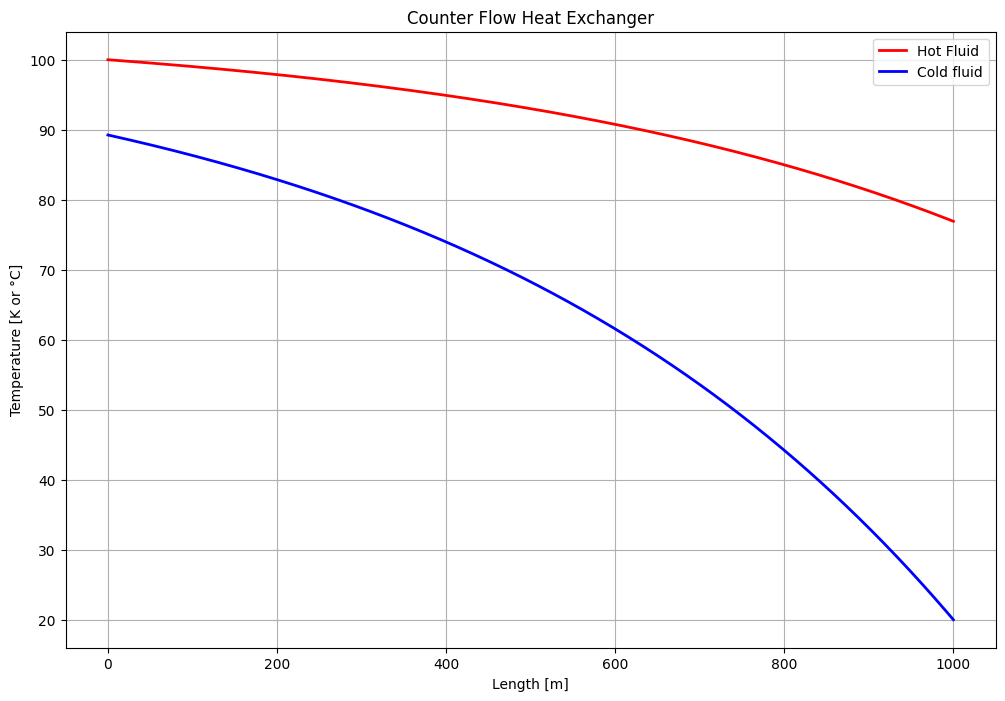

In [21]:
# Do not edit this script (unless you know pretty well what you are doing)

x = np.linspace(0, L, 1000)

lda = -(U*A/L)*(1/(dmq*cp_q)-1/(dmf*cp_f))

rc = dmq*cp_q/(dmf*cp_f)

TQ = (tfe - tqe*rc*np.exp(lda*L))/(1-rc*np.exp(lda*L)) + \
     (tqe - tfe)*np.exp(lda*x)/(1-rc*np.exp(lda*L))

TF = (tfe - tqe*rc*np.exp(lda*L))/(1-rc*np.exp(lda*L)) + \
     (tqe - tfe)*rc*np.exp(lda*x)/(1-rc*np.exp(lda*L))

plt.figure(figsize=(12,8))
h1 = plt.plot(x,TQ, 'r', linewidth=2, label="Hot Fluid")
h2 = plt.plot(x,TF, 'b', linewidth=2, label="Cold fluid")
plt.legend()
plt.xlabel('Length [m]')
plt.ylabel('Temperature [K or °C]')
plt.title('Counter Flow Heat Exchanger')
plt.grid()
plt.show()
